<a href="https://colab.research.google.com/github/omanshuthapliyal/ML2Coursework/blob/master/Omanshu_Thapliyal_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Omanshu Thapliyal
#ECE 595 Machine Learning II
#Project 3: GAN - Student Code

In [3]:
#Import necessary packages
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import load_model
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


#Part 1: Implementing the GAN

In [4]:
#Load MNIST data and normalize to [-1, 1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = 2*(data_train/255.0 - 0.5)
data_test = 2*(data_test/255.0 - 0.5)
print(data_test.min(),data_test.max())

#Reshape training and testing data into 784-dimensional vectors
try:
  d = data_train.shape[1]
  data_train = data_train.reshape((data_train.shape[0], 
                                  d*d))
  data_test = data_test.reshape((data_test.shape[0], 
                               d*d))
except:
  print("training data shape: ", data_train.shape)
  print("testing data shape: ", data_test.shape)
  print("Data was reshaped already")

11501568/11490434 [==============================] - 1s 0us/step
(-1.0, 1.0)


In [0]:
# The D-dimensional noise vector length
latent_dim = 100
data_dim = 784

# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def adam_optimizer():
  # This is used for discriminator & generator
  return adam(lr = 0.00002, beta_1 = 0.5, beta_2 = 0.999)

# Optimizer for generator, which will have a lower learning rate than adversarial model
def gan_optimizer():
  # This is used for the GAN model
  return adam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999)

def accuracy(y_pred, y_true):
	return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

## Generator model

In [0]:
# Generator model
def create_generator():
  # Input layer: a 100-dimensional noise vector
  # First hidden layer: a dense (fully-connected) layer consisting of 200 - 300 units with a LeakyReLU activation
  generator = Sequential()
  generator.add(Dense(250,input_dim=latent_dim,
                activation=LeakyReLU(0.1)) )
  # Second hidden layer: a dense (fully-connected) layer consisting of 500 - 600 units with a LeakyReLU activation
  generator.add(Dense(550, activation=LeakyReLU(0.1)) )
  # Third hidden layer: a dense (fully-connected) layer consisting of 1000 - 1200 units with a LeakyReLU activation
  generator.add(Dense(1100, activation=LeakyReLU(0.15)) )
  # Output layer: the 784-dimensional generated image with a hyperbolic tangent activation
  generator.add(Dense(data_dim, activation = 'tanh'))
  # Compiling model
  generator.compile(loss='binary_crossentropy',
                    optimizer = adam_optimizer())
  return generator

## Discriminator model

In [0]:
# Discriminator model
def create_discriminator():
  discriminator = Sequential()
  # Input layer: a 784-dimensional vector of the image data
  # First hidden layer: a dense (fully-connected) layer consisting of 1000 - 1200 units 
  # with a LeakyReLU activation (add a ‘Dropout’ layer to avoid overfitting)
  discriminator.add(Dense(1100,input_dim=784,
                    activation=LeakyReLU(0.15))  )
  discriminator.add(Dropout(0.10))
  # Second hidden layer: a dense (fully-connected) layer consisting of 500 - 600 units 
  # with a LeakyReLU activation (add a ‘Dropout’ layer to avoid overfitting)
  discriminator.add(Dense(550, activation=LeakyReLU(0.1)) )
  discriminator.add(Dropout(0.1))
  # Third hidden layer: a dense (fully-connected) layer consisting of 200 - 300 units with a LeakyReLU activation
  discriminator.add(Dense(250, activation=LeakyReLU(0.1)) )   
  # Output layer: a single Dense unit with a sigmoid activation indicating whether the image is ‘real’ or ‘fake’
  discriminator.add(Dense(units=1, activation = 'sigmoid'))
  discriminator.compile(loss='binary_crossentropy',
                        optimizer = adam_optimizer(),
                        metrics = [accuracy])
  return discriminator

## GAN model

In [0]:
# GAN model
def create_gan(discriminator, generator):
  discriminator.trainable = False
  gan_input = Input(shape = (latent_dim,))
  x = generator(gan_input)
  gan_output = discriminator(x)
  gan = Model(inputs = gan_input, outputs = gan_output)
  gan.compile(loss = 'binary_crossentropy',
              optimizer = gan_optimizer(), 
              metrics = [accuracy])
  return gan

In [9]:
# Creating Graph for GAN
generator = create_generator()
discriminator = create_discriminator()
gan = create_gan(discriminator, generator)

W1028 20:39:50.862469 139813245630336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python2.7/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
W1028 20:39:50.883863 139813245630336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1028 20:39:50.890290 139813245630336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform ins

In [0]:
# Model and training parameters
epochs = 100000
batch_size = 64
sample_interval = epochs/10
# Array to save training history
training_meta_data = np.zeros([epochs, 4])

In [11]:
print("GAN MODEL")
gan.summary()
print("DISCRIMINATOR MODEL")
discriminator.summary()
print("GENERATOR MODEL")
generator.summary()

GAN MODEL
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1632584   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1607051   
Total params: 3,239,635
Trainable params: 1,632,584
Non-trainable params: 1,607,051
_________________________________________________________________
DISCRIMINATOR MODEL
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1100)              863500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1100)              0         
____________________________

/usr/local/lib/python2.7/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


W1028 20:39:51.317922 139813245630336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1028 20:39:51.321446 139813245630336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1028 20:39:51.324186 139813245630336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1028 20:39:51.366250 139813245630336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1028 20:39:51.367640 139813245630336 module_wrapper.py:1

Epoch 10000
10000: [Discriminator loss: 0.298571, acc: 0.898438]  [GAN loss: 1.795002, acc: 0.125000]


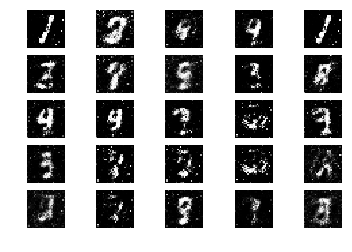

Epoch 20000
20000: [Discriminator loss: 0.588959, acc: 0.695312]  [GAN loss: 1.259099, acc: 0.218750]


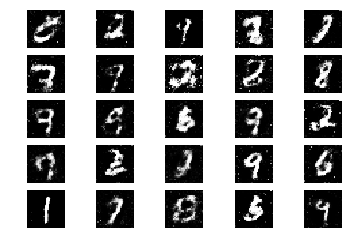

Epoch 30000
30000: [Discriminator loss: 0.595301, acc: 0.679688]  [GAN loss: 0.862500, acc: 0.390625]


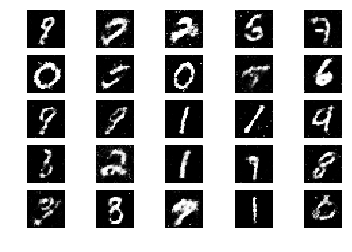

Epoch 40000
40000: [Discriminator loss: 0.571213, acc: 0.687500]  [GAN loss: 1.144624, acc: 0.187500]


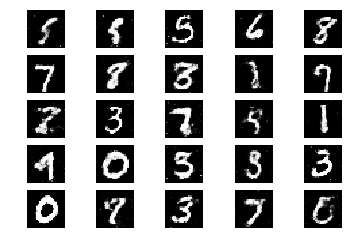

Epoch 50000
50000: [Discriminator loss: 0.601363, acc: 0.687500]  [GAN loss: 0.985115, acc: 0.328125]


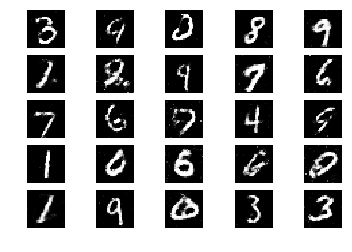

Epoch 60000
60000: [Discriminator loss: 0.624576, acc: 0.648438]  [GAN loss: 1.010531, acc: 0.281250]


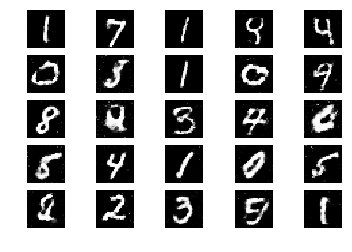

Epoch 70000
70000: [Discriminator loss: 0.558806, acc: 0.718750]  [GAN loss: 1.041468, acc: 0.250000]


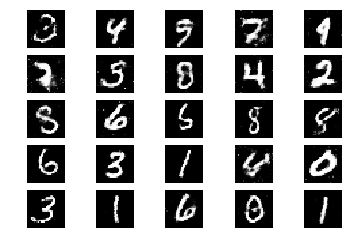

Epoch 80000
80000: [Discriminator loss: 0.611473, acc: 0.695312]  [GAN loss: 1.085971, acc: 0.187500]


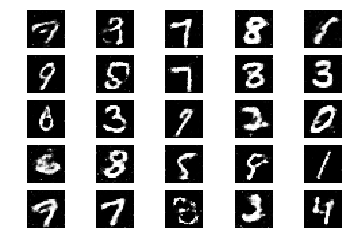

Epoch 90000
90000: [Discriminator loss: 0.590274, acc: 0.687500]  [GAN loss: 1.060094, acc: 0.328125]


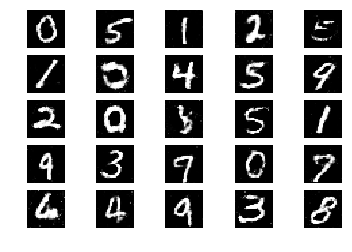

Epoch 100000
100000: [Discriminator loss: 0.545394, acc: 0.750000]  [GAN loss: 0.914819, acc: 0.406250]


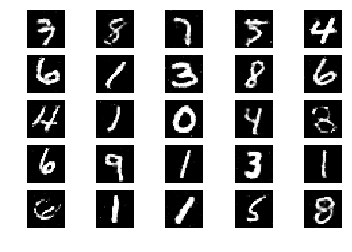

In [12]:
# Training the GAN
for e in range(1, epochs+1):
    # Generate random noise as input
    noise=np.random.normal(loc=0.0, scale=1.0, size=(batch_size,latent_dim))
    # Generate fake MNIST images from generated noise
    fake_images = generator.predict(noise)
    # Get a random set of real MNIST images
    # selector_array = np.random.choice(data_train.shape[0], size = batch_size)
    # real_images = data_train[selector_array,:]
    real_images=data_train[np.random.choice(len(data_train),batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    data_total = np.concatenate((real_images, fake_images))
    # Assign training labels (assign high probability, but not 1, to real images)
    labels_real = np.ones(batch_size)
    labels_fake = np.zeros(batch_size)
    labels_discriminator = np.concatenate((labels_real, labels_fake))

    # Allow discriminator parameters to be updated
    discriminator.trainable = True
    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    d_loss=np.empty(2)
    d_loss[0], d_loss[1]=discriminator.train_on_batch(data_total,labels_discriminator)
    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data

    noise=np.random.normal(loc=0.0, scale=1.0, size=(batch_size,100))
    labels_generator=np.ones(batch_size)

    # Keep discriminator weights constant while training generator
    discriminator.trainable=False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    gan_loss=np.empty(2)
    gan_loss[0], gan_loss[1] = gan.train_on_batch(noise, labels_generator)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]

    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:      
        # Print training status
        print("Epoch %d" %e)
        log_mesg = "%d: [Discriminator loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        # Plot images 
        r, c = 5, 5
        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(noise)
        # Rescale images 0 - 1
        
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

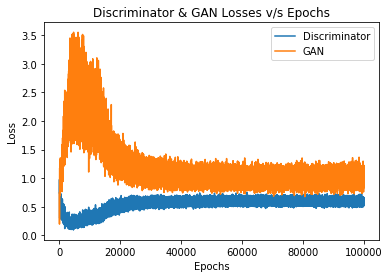

In [17]:
# Plot model loss vs epoch
plt.plot(training_meta_data[:, 0], label = "Discriminator")
plt.plot(training_meta_data[:, 1], label = "GAN")
plt.title("Discriminator & GAN Losses v/s Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

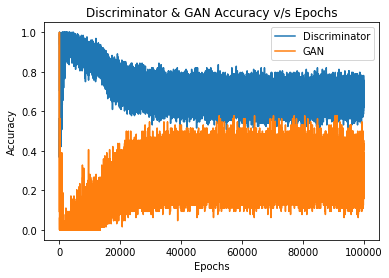

In [18]:
# Plot accuracy vs epoch
plt.plot(training_meta_data[:, 2], label = "Discriminator")
plt.plot(training_meta_data[:, 3], label = "GAN")
plt.title("Discriminator & GAN Accuracy v/s Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

Answer the following questions:



1.   Why does the accuracy of the discriminator remain around 50%? Is this a good trait of the GAN? 

  ANS: Generator & discriminator are being trained against each other in a zero sum game, where the failure of one rewards the other and vice versa. Hence, a 50% discriminator accuracy should denote convergence to optimum in the performance of the GAN overall.
Note that the other two equilibria we observed were generator having 100% accuracy and discriminator 0% and vice versa. These are all due to the zero sum problem formumlation where the two networks are competing against each other.

Note that "Typically, a neural network fails to converge when the model loss does not settle down during the training process. In the case of a GAN, a failure to converge refers to not finding an equilibrium between the discriminator and the generator." [[from this link]](https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/)

2.   How could this model be modified to produce cleaner (less noisy) images? 

  ANS: The model could use a reduced dimensionality, or outputs from the autoencoder from Project 2 in order to produce less noisy images.

#Part 2: Generating samples using trained generator

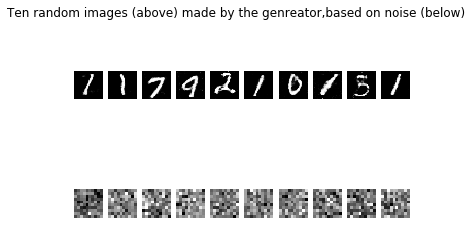

In [41]:
# Generate ten images from Gaussian noise using the trained generator from Part 1
ctr = 0
r = 2
c = 10
fig, axs = plt.subplots(r, c)
# for i in range(r):
images = np.empty((c,28*28))
for j in range(c):
  noise=np.random.normal(loc=0.0, scale=1.0, size=(1,100))
  gen_img = generator.predict(noise)
  gen_img = 0.5 * gen_img + 0.5
  axs[0,j].imshow((gen_img.reshape(28, 28)), cmap='gray')
  axs[0,j].axis('off')
  axs[1,j].imshow((noise.reshape(10, 10)), cmap='gray')
  axs[1,j].axis('off')
  images[j,:] = gen_img
  ctr += 1
plt.suptitle("Ten random images (above) made by the genreator,based on noise (below)")
plt.show()

#Part 3: Testing accuracy of generated images on ten samples

In [0]:
# Load mnist classifier and generated images
mnist_classifier = load_model('mnist_classifier.h5')

In [67]:
# ASSIGN CLASSES
labels = [1,1,7,9,2,1,0,1,5,1]

# Convert integer labels to one-hot labels 
y_obs = keras.utils.np_utils.to_categorical(labels, num_classes=10)
print(mnist_classifier.summary())

# Show classifications
y_pred = mnist_classifier.predict_classes(images)
print("Observed labels:",labels)
print("Predicted labels:",y_pred)
# Evaluate accuracy
print("Heuristic accuracy = %0.2f%%" %(100*float((y_pred==labels).sum())/y_pred.size) )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None
('Observed labels:', [1, 1, 7, 9, 2, 1, 0, 1, 5, 1])
('Predicted labels:', array([1, 1, 7, 9, 2, 1, 0, 1, 3, 1]))
Heuristic accurac